### Neural Network Implementation

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import tensorflow as tf


checkpoint = ModelCheckpoint(filepath = "weights.hdf5", verbose=1, save_best_only=True)

def get_model(activation = "relu"):
    
    model = Sequential()
    model.add(Dense(64, activation=activation, input_dim = 85))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
    return model

In [8]:
import pandas as pd
train   = pd.read_csv("./samll_base_table.csv", sep=",",low_memory=False)

### Here I used the data set  processed using the methods included in the example of class as the training set.

In [9]:
test = train[1:25000]

In [10]:
train.head()

,Unnamed: 0,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
0,811106,6,62,57,7353,2,7,2,1066,7678,...,2,3,11,1,3,5,10,4,7,3
1,325572,6,60,51,6741,2,7,2,1066,7678,...,2,2,4,0,3,5,10,8,7,3
2,90642,6,62,32,7571,2,7,2,1066,6985,...,2,2,8,1,3,5,5,3,7,3
3,6288,6,61,57,7033,2,7,2,1066,7678,...,2,3,6,0,5,5,10,6,7,3
4,105945,6,61,57,6944,2,7,2,1066,7678,...,2,2,3,1,3,5,10,3,7,3


In [11]:
test.head()

,Unnamed: 0,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
1,325572,6,60,51,6741,2,7,2,1066,7678,...,2,2,4,0,3,5,10,8,7,3
2,90642,6,62,32,7571,2,7,2,1066,6985,...,2,2,8,1,3,5,5,3,7,3
3,6288,6,61,57,7033,2,7,2,1066,7678,...,2,3,6,0,5,5,10,6,7,3
4,105945,6,61,57,6944,2,7,2,1066,7678,...,2,2,3,1,3,5,10,3,7,3
5,615292,6,62,32,7795,2,7,2,1066,7678,...,2,3,10,1,3,5,5,6,7,3


In [12]:
train = train.drop("Unnamed: 0",axis = 1)

In [13]:
test = test.drop("Unnamed: 0",axis = 1)

In [14]:
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
0,6,62,57,7353,2,7,2,1066,7678,2,...,2,3,11,1,3,5,10,4,7,3
1,6,60,51,6741,2,7,2,1066,7678,2,...,2,2,4,0,3,5,10,8,7,3
2,6,62,32,7571,2,7,2,1066,6985,3,...,2,2,8,1,3,5,5,3,7,3
3,6,61,57,7033,2,7,2,1066,7678,2,...,2,3,6,0,5,5,10,6,7,3
4,6,61,57,6944,2,7,2,1066,7678,2,...,2,2,3,1,3,5,10,3,7,3


In [15]:
test.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
1,6,60,51,6741,2,7,2,1066,7678,2,...,2,2,4,0,3,5,10,8,7,3
2,6,62,32,7571,2,7,2,1066,6985,3,...,2,2,8,1,3,5,5,3,7,3
3,6,61,57,7033,2,7,2,1066,7678,2,...,2,3,6,0,5,5,10,6,7,3
4,6,61,57,6944,2,7,2,1066,7678,2,...,2,2,3,1,3,5,10,3,7,3
5,6,62,32,7795,2,7,2,1066,7678,2,...,2,3,10,1,3,5,5,6,7,3


In [16]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = train[train.columns[~train.columns.isin(['HasDetections'])]]
y = train[['HasDetections']]
test_X = test

X_scaled = StandardScaler().fit(X).transform(X)
test_X_sceled = StandardScaler().fit(test_X).transform(test_X)

X_scaled = pd.DataFrame(X_scaled) 
test_X_sceled = pd.DataFrame(test_X_sceled) 

X_scaled.columns = X.columns
test_X_sceled.columns = test_X.columns

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, stratify = y)

In [18]:
import numpy as np
#Vectorize labels
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')

In [19]:
X_train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
90716,0.102631,0.166120,-1.230476,0.060982,-0.003162,0.1348,-0.130994,-6.965024,0.103413,-0.550013,...,-0.199752,-0.254631,1.214923,1.110125,-0.254801,0.324908,-1.265309,0.814513,0.403969,-0.456313
96945,0.102631,0.166120,-0.734155,0.044411,-0.003162,0.1348,-0.130994,0.201852,-0.082913,1.041276,...,-0.199752,-0.254631,1.214923,-0.880579,-0.254801,0.324908,-0.952404,0.814513,0.403969,-0.456313
79837,0.102631,0.355541,0.313635,0.278609,-0.003162,0.1348,-0.130994,0.201852,0.103413,-0.550013,...,-0.199752,-0.254631,3.063249,2.216071,2.611675,0.324908,0.299215,-0.368409,0.403969,-0.456313
81822,0.102631,0.355541,0.313635,0.690664,-0.003162,0.1348,-0.130994,0.201852,0.103413,-0.550013,...,-0.199752,-0.254631,-0.633403,-0.880579,-0.254801,0.324908,0.299215,0.814513,0.403969,-0.456313
42775,0.102631,0.166120,2.354067,0.259829,-0.003162,0.1348,-0.130994,0.201852,0.103413,-0.550013,...,-0.199752,-0.254631,-0.633403,1.552503,-0.254801,0.324908,2.176645,-0.368409,0.403969,2.293295


In [20]:
test_X_sceled.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTotalCapacityCategory,EngineVersionCategory,AppVersionCategory,SmartScreenCategory,AVProductStatesIdentifierCategory,IeVerIdentifierCategory
0,0.101606,-0.022933,-0.015394,-0.343200,-0.006325,0.135966,-0.132607,0.202712,0.103824,-0.539209,...,-0.254713,-0.637017,-0.658353,-0.995729,-0.262511,0.322655,0.30136,0.807795,0.396123,-0.454385
1,0.101606,0.354862,-1.067588,0.574497,-0.006325,0.135966,-0.132607,0.202712,-0.286029,1.052818,...,-0.254713,-0.637017,0.224844,1.004289,-0.262511,0.322655,-1.26921,-2.167172,0.396123,-0.454385
2,0.101606,0.165965,0.316878,-0.020348,-0.006325,0.135966,-0.132607,0.202712,0.103824,-0.539209,...,-0.254713,1.204425,-0.216754,-0.995729,2.590131,0.322655,0.30136,-0.382191,0.396123,-0.454385
3,0.101606,0.165965,0.316878,-0.118751,-0.006325,0.135966,-0.132607,0.202712,0.103824,-0.539209,...,-0.254713,-0.637017,-0.879152,1.004289,-0.262511,0.322655,0.30136,-2.167172,0.396123,-0.454385
4,0.101606,0.354862,-1.067588,0.822165,-0.006325,0.135966,-0.132607,0.202712,0.103824,-0.539209,...,-0.254713,1.204425,0.666443,1.004289,-0.262511,0.322655,-1.26921,-0.382191,0.396123,-0.454385


### In order to implement the neural network using Keras, I converted the format of our dataset using np.array

In [21]:
X_train = np.array(X_train)

In [22]:
y_train = np.array(y_train)

In [23]:
X_valid = np.array(X_valid)

In [24]:
y_valid = np.array(y_valid)

In [25]:
test_X_sceled = np.array(test_X_sceled)

In [81]:
model = get_model()

history = model.fit(X_train, y_train, batch_size = 32, epochs = 32, validation_data=[X_valid, y_valid], callbacks = [checkpoint])

Train on 70000 samples, validate on 30000 samples
Epoch 1/32
70000/70000 [==============================] - 7s 106us/step - loss: 0.6929 - accuracy: 0.5325 - val_loss: 0.6862 - val_accuracy: 0.5281

Epoch 00001: val_loss did not improve from 0.64338
Epoch 2/32
70000/70000 [==============================] - 6s 90us/step - loss: 0.6719 - accuracy: 0.5865 - val_loss: 0.6657 - val_accuracy: 0.5942

Epoch 00002: val_loss did not improve from 0.64338
Epoch 3/32
70000/70000 [==============================] - 6s 80us/step - loss: 0.6604 - accuracy: 0.6026 - val_loss: 0.6605 - val_accuracy: 0.6127

Epoch 00003: val_loss did not improve from 0.64338
Epoch 4/32
70000/70000 [==============================] - 6s 91us/step - loss: 0.6550 - accuracy: 0.6076 - val_loss: 0.6602 - val_accuracy: 0.6110

Epoch 00004: val_loss did not improve from 0.64338
Epoch 5/32
70000/70000 [==============================] - 7s 99us/step - loss: 0.6545 - accuracy: 0.6115 - val_loss: 0.6586 - val_accuracy: 0.6111

Epoch

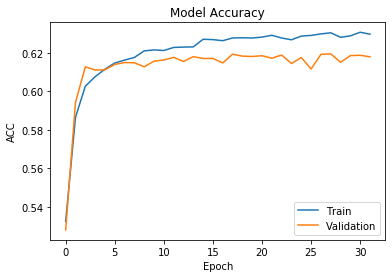

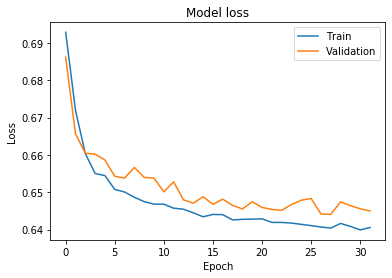

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('ACC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [83]:
y_pred = model.predict(X_valid)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score 

In [85]:
y_pred = model.predict(X_valid)
probabilities = pd.DataFrame(model.predict_proba(X_valid))
auc           = roc_auc_score(np.array(y_valid),np.array(probabilities))

In [86]:
auc

0.6741027527641041